In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


# 2

## [25 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience applying clustering algorithms and comparing these techniques on various datasets to experience the pros and cons of these approaches when the structure of the data being clustered varies. For this exercise, we'll explore clustering in two dimensions to make the results more tangible, but in practice these approaches can be applied to any number of dimensions.

*Note: For each set of plots across the five datasets, please create subplots within a single figure (for example, when applying DBSCAN - please show the clusters resulting from DBSCAN as a single figure with one subplot for each dataset). This will make comparison easier.*

**(a) Run K-means and choose the number of clusters**. Five datasets are provided for you below and the code to load them below.
- Scatterplot each dataset
- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is known as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.
- For each dataset, where is the elbow in the curve of within-cluster sum-of-squares and why? Is the elbow always clearly visible? When it's not clear, you will have to use your judgment in terms of selecting a reasonable number of clusters for the data. *There are also other metrics you can use to explore to measure the quality of cluster fit (but do not have to for this assignment) including the silhouette score, the Calinski-Harabasz index, and the Davies-Bouldin, to name a few within sklearn alone. However, assessing the quality of fit without "preferred" cluster assignments to compare against (that is, in a truly unsupervised manner) is challenging because measuring cluster fit quality is typically poorly-defined and doesn't generalize across all types of inter- and intra-cluster variation.*
- Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgment for each dataset and your inspection of the dataset.

**(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

**(c) Apply Spectral Clustering**. Select the same number of clusters as selected by k-means.

**(d) Comment on the strengths and weaknesses of each approach**. In particular, mention: 
- Which technique worked "best" and "worst" (as defined by matching how human intuition would cluster the data) on each dataset?
- How much effort was required to get good clustering for each method (how much parameter tuning needed to be done)?

*Note: For these clustering plots in this question, do NOT include legends indicating cluster assignment; instead, just make sure the cluster assignments are clear from the plot (e.g. different colors for each cluster)*



Code is provided below for loading the datasets and for making plots with the clusters as distinct colors

In [2]:
################################
# Load the data
################################
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

# Create / load the datasets:
n_samples = 1500
X0, _ = make_blobs(n_samples=n_samples, centers=2, n_features=2, random_state=0)
X1, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=0)

random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.3)
transformation = [[0.6, -0.6], [-0.2, 0.8]]
X2 = np.dot(X, transformation)
X3, _ = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
X4, _ = make_moons(n_samples=n_samples, noise=.12)

X = [X0, X1, X2, X3, X4]
# The datasets are X[i], where i ranges from 0 to 4

In [3]:
################################
# Code to plot clusters
################################
def plot_cluster(ax, data, cluster_assignments):
    '''Plot two-dimensional data clusters
    
    Parameters
    ----------
    ax : matplotlib axis
        Axis to plot on
    data : list or numpy array of size [N x 2] 
        Clustered data
    cluster_assignments : list or numpy array [N]
        Cluster assignments for each point in data

    '''
    clusters = np.unique(cluster_assignments)
    n_clusters = len(clusters)
    for ca in clusters:
        kwargs = {}
        if ca == -1:
            # if samples are not assigned to a cluster (have a cluster assignment of -1, color them gray)
            kwargs = {'color':'gray'}
            n_clusters = n_clusters - 1
        ax.scatter(data[cluster_assignments==ca, 0], data[cluster_assignments==ca, 1],s=5,alpha=0.5, **kwargs)
        ax.set_xlabel('feature 1')
        ax.set_ylabel('feature 2')
        ax.set_title(f'No. Clusters = {n_clusters}')
        ax.axis('equal')

**(a) Run K-means and choose the number of clusters**. Five datasets are provided for you below and the code to load them below.
- Scatterplot each dataset
- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is known as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.
- For each dataset, where is the elbow in the curve of within-cluster sum-of-squares and why? Is the elbow always clearly visible? When it's not clear, you will have to use your judgment in terms of selecting a reasonable number of clusters for the data. *There are also other metrics you can use to explore to measure the quality of cluster fit (but do not have to for this assignment) including the silhouette score, the Calinski-Harabasz index, and the Davies-Bouldin, to name a few within sklearn alone. However, assessing the quality of fit without "preferred" cluster assignments to compare against (that is, in a truly unsupervised manner) is challenging because measuring cluster fit quality is typically poorly-defined and doesn't generalize across all types of inter- and intra-cluster variation.*
- Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgment for each dataset and your inspection of the dataset.

- Scatterplot each dataset

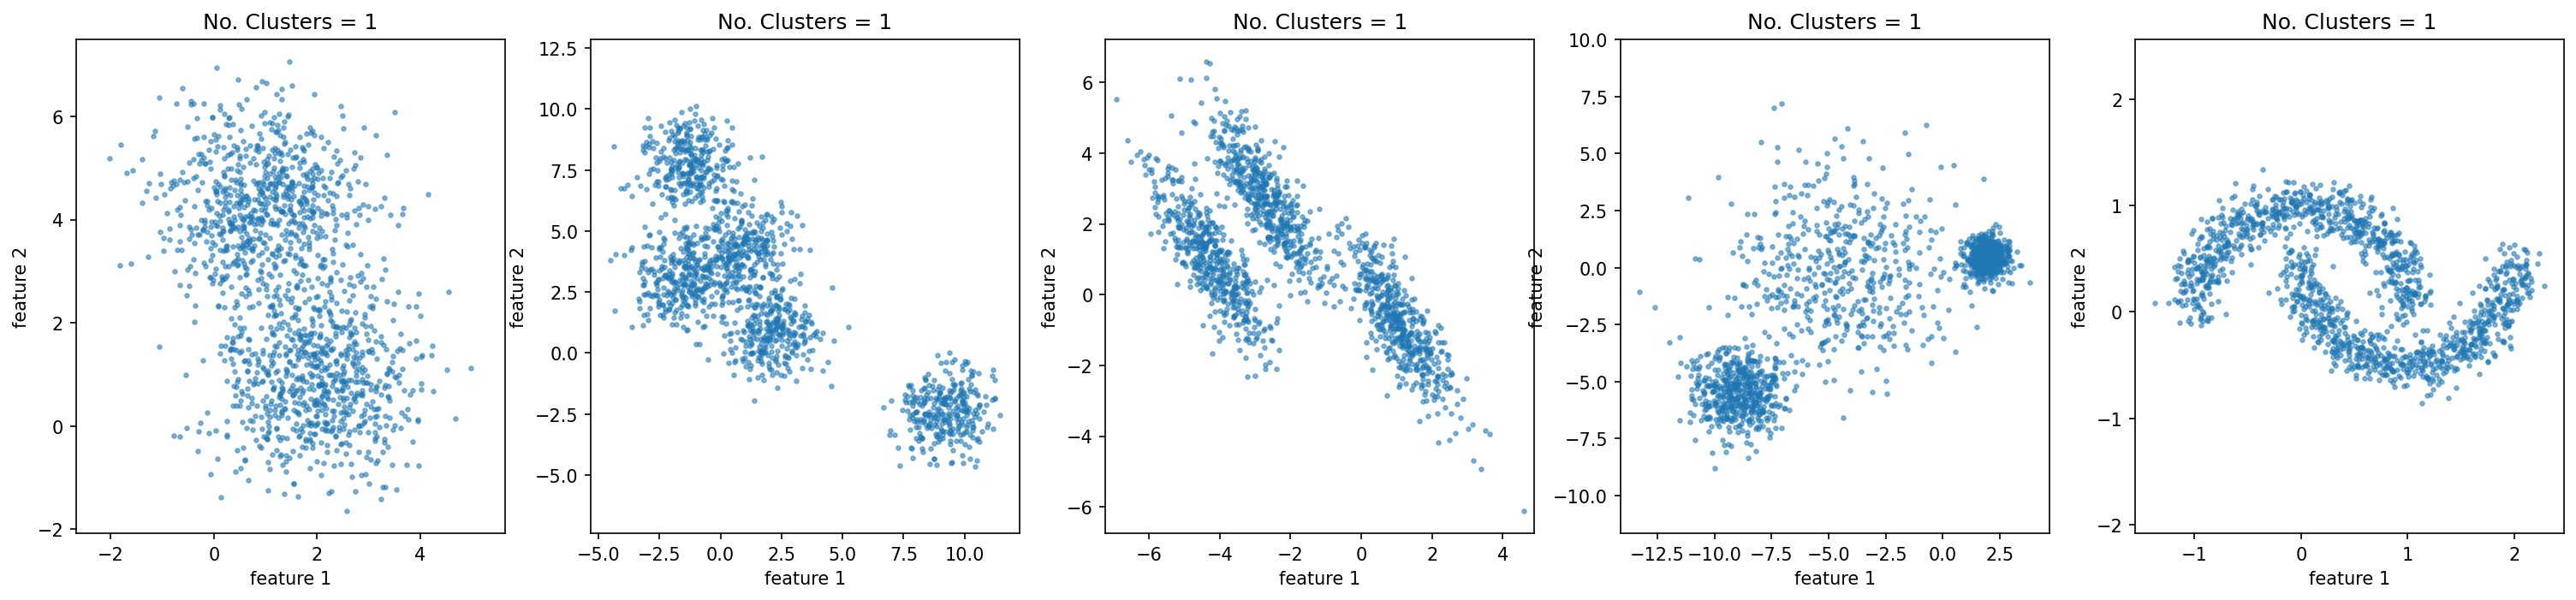

In [13]:
#use matplotlib to scatter plot each dataset
#set the dpi of the plot to 150
 
plt.rcParams['figure.dpi'] = 150
fig, axes = plt.subplots(1, 5, figsize=(25, 5))
for i, ax in enumerate(axes):
    plot_cluster(ax, X[i], np.zeros(X[i].shape[0]))

plt.show()




- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is known as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.